<a href="https://colab.research.google.com/github/AlkaidCheng/CloudChamberTrackClassification/blob/master/VariationalQuantumClassifier_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quple

     |████████████████████████████████| 1.4MB 10.4MB/s 
     |████████████████████████████████| 3.9MB 34.2MB/s 
     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 163kB 42.5MB/s 
     |████████████████████████████████| 3.9MB 39.9MB/s 
     |████████████████████████████████| 450kB 42.0MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 112kB 47.0MB/s 
     |████████████████████████████████| 133kB 42.3MB/s 
  Created wheel for pathos: filename=pathos-0.2.5-cp36-none-any.whl size=77577 sha256=b2311f662b84579481e3d49a7f7d8eefe1455dad6845b1c7d8fe50bc4abdb008
  Stored in directory: /root/.cache/pip/wheels/61/6d/83/90b0c3d2c271da2c4850731e894798c98f8dbedbac74e8eff0
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e548bca66b8947af8d15be32f596657b8d745e6093fcb27dee75bb7ae035bc4d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb

In [2]:
# download training data (hmumu 2jet)
!wget -O hmumu_2jet.tar.gz https://cernbox.cern.ch/index.php/s/frrpvyVfSPYdMSk/download
!tar -zxf hmumu_2jet.tar.gz

--2020-08-09 14:22:49--  https://cernbox.cern.ch/index.php/s/frrpvyVfSPYdMSk/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 188.184.97.72, 137.138.120.151, 128.142.32.26, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|188.184.97.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648491 (1.6M) [application/gzip]
Saving to: ‘hmumu_2jet.tar.gz’

hmumu_2jet.tar.gz   100%[===================>]   1.57M  1.72MB/s    in 0.9s    

Last-modified header invalid -- time-stamp ignored.
2020-08-09 14:22:52 (1.72 MB/s) - ‘hmumu_2jet.tar.gz’ saved [1648491/1648491]



In [3]:
import numpy as np
# prepare training data
data = np.load('hmumu_twojet_0719.npy')
x = data[:,:-1]
y = data[:,-1]
print('Input Variables')
print(x)
print('Labels')
print(y)

Input Variables
[[ 1.35123826e+02  9.97897017e-01  9.58638570e-01 ...  4.58769383e-01
  -3.05654504e+00  1.80854129e+03]
 [ 2.43290406e+02  3.03747750e-01  6.74568519e-01 ... -1.34468994e+00
  -2.72506172e+00  5.11933555e+02]
 [ 1.64464537e+02 -5.81922591e-02  5.42151745e-02 ... -6.23148328e-01
   3.07514485e+00  3.44958465e+02]
 ...
 [ 2.16542712e+01 -3.05524425e+00  4.59151309e-01 ...  9.26630829e-01
   3.08020790e+00  5.62347204e+02]
 [ 4.19387585e+01  1.89239955e+00  4.48033832e-01 ...  1.73410377e+00
  -2.62992120e+00  1.44320990e+02]
 [ 9.33202609e+01  8.70685882e-01  8.74988118e-01 ... -1.21892943e+00
   2.85587492e+00  2.03240716e+02]]
Labels
[1. 1. 1. ... 0. 0. 0.]


In [4]:
# let's say we want to train on a circuit with 5 qubit
n_qubit = 5
# let's say we want to train on 1000 events
n_event = 1000

In [6]:
# prepare data preprocessors from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
# we apply 3 data preprocessors
# 1. PCA to reduce the dimension to 5 to fit the 5 qubit circuit
# 2. StandardScaler to standardize features by removing the mean and scaling to unit variance
# 3. MinMaxScaler to bound the data in the range [-1,+1]
preprocessors = [PCA(n_components=n_qubit, random_state=3), StandardScaler(), MinMaxScaler((-1,1))]
from quple.components.data_preparation import prepare_train_val_test
# split the data into training set, validation set and test set
x_train, x_val, x_test, y_train, y_val, y_test = prepare_train_val_test(x, y, train_size=n_event, val_size=n_event, test_size=n_event, preprocessors=preprocessors, stratify=y)
print('Training Dataset')
print(x_train)
print('Training Labels')
print(y_train)
print('Validation Dataset')
print(x_val)
print('Validation Labels')
print(y_val)
print('Test Dataset')
print(x_test)
print('Test Labels')
print(y_test)

Training Dataset
[[-4.34169963e-03 -6.26640732e-01 -4.98983735e-01 -7.89897273e-02
   5.83961166e-01]
 [-9.15518399e-01 -4.44125411e-01 -3.60450171e-01 -9.11948154e-04
  -3.85094860e-01]
 [-9.29266111e-01 -4.55227712e-01 -4.64185740e-01 -1.02825104e-01
  -1.18712114e-01]
 ...
 [-9.09277900e-01 -4.32655424e-01 -5.87509278e-01  9.57256218e-03
  -3.08770996e-01]
 [-8.31883410e-01 -6.51868551e-01 -5.17791015e-01  3.20667031e-02
   5.67585871e-02]
 [-9.41304583e-01 -4.46796651e-01 -4.28132769e-01  8.56886629e-02
  -1.50095512e-01]]
Training Labels
[1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 

In [9]:
from quple.data_encoding import FirstOrderExpansion
# let's try the first order expansion encoding circuit with depth 2
encoding_circuit = FirstOrderExpansion(feature_dimension=n_qubit, copies=2)
print(encoding_circuit)

(0, 0): ───H───Rz(pi*x_0)───H───Rz(pi*x_0)───

(0, 1): ───H───Rz(pi*x_1)───H───Rz(pi*x_1)───

(0, 2): ───H───Rz(pi*x_2)───H───Rz(pi*x_2)───

(0, 3): ───H───Rz(pi*x_3)───H───Rz(pi*x_3)───

(0, 4): ───H───Rz(pi*x_4)───H───Rz(pi*x_4)───


In [10]:
from quple.trial_wavefunction import EfficientSU2
# let's try the Efficient SU2 variational circuit with depth 2
variational_circuit = EfficientSU2(n_qubit=n_qubit, copies=2)
# let's add an RZ layer to increase the number of training variables
variational_circuit.add_rotation_layer(['RZ'])
# add readout qubit and entangle it to all other qubits
variational_circuit.add_readout('XX')
print(variational_circuit)

                                             ┌──┐       ┌──┐                                             ┌──┐       ┌──┐
(-1, -1): ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────XX──────────XX──────────XX──────────XX──────────XX──────────
                                                                                                                                          │           │           │           │           │
(0, 0): ─────Ry(θ_0)───Rz(θ_5)───@───@───@────@────────────────────────Ry(θ_10)───Rz(θ_15)───@───@───@────@────────────────────Rz(θ_20)───XX^(θ_25)───┼───────────┼───────────┼───────────┼───────────
                                 │   │   │    │                                              │   │   │    │                                           │           │           │           │
(0, 1): ─────Ry(θ_1)───Rz(θ_6)───X───┼───┼────┼@────@────@─────────────Ry(θ_11)───Rz(θ_16)───X───┼───┼───

In [13]:
import tensorflow as tf
from quple.classifiers.variational_quantum_classifier import VQC
from quple.classifiers.vqc_logger import VQCLogger
# construct the vqc model
vqc = VQC(encoding_circuit, variational_circuit, activation='sigmoid',
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['binary_accuracy','AUC'], loss='mse',
          readout=[variational_circuit.readout_measurement()], trainable_dense_layer=False)
logger = VQCLogger()

Registered encoding circuit with feature dimension: 5
Registered variational circuit with number of parameters: 30


In [14]:
# let's begin our training
vqc.run(x_train, y_train, x_val, y_val, x_test, y_test, batch_size=64, epochs=100, callbacks=[logger])

Converting circuits to tensors...
Converting circuits to tensors...
2020-08-09 14:27:23,143 [MainThread  ][INFO ]  ######## Executing VQC with the following attributes ########
2020-08-09 14:27:23,144 [MainThread  ][INFO ]  Feature Dimension: 5
2020-08-09 14:27:23,147 [MainThread  ][INFO ]  Number of Qubits: 6
2020-08-09 14:27:23,149 [MainThread  ][INFO ]  Qubit Layout: [cirq.GridQubit(-1, -1), cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4)]
2020-08-09 14:27:23,151 [MainThread  ][INFO ]  Encoding Circuit: FirstOrderExpansion
2020-08-09 14:27:23,153 [MainThread  ][INFO ]  Encoding Map: self_product
2020-08-09 14:27:23,157 [MainThread  ][INFO ]  Variational Circuit: EfficientSU2
2020-08-09 14:27:23,159 [MainThread  ][INFO ]  Circuit Parameters: ['θ_0', 'θ_1', 'θ_10', 'θ_11', 'θ_12', 'θ_13', 'θ_14', 'θ_15', 'θ_16', 'θ_17', 'θ_18', 'θ_19', 'θ_2', 'θ_20', 'θ_21', 'θ_22', 'θ_23', 'θ_24', 'θ_25', 'θ_26', 'θ_27', 'θ_28', 'θ_29', 'θ_

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.2477 - binary_accuracy: 0.6820 - AUC: 0.7133 - val_loss: 0.2457 - val_binary_accuracy: 0.6360 - val_AUC: 0.7803
Epoch 2/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 0.2439 - binary_accuracy: 0.6460 - AUC: 0.7824 - val_loss: 0.2429 - val_binary_accuracy: 0.6210 - val_AUC: 0.7909
Epoch 3/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 0.2418 - binary_accuracy: 0.6360 - AUC: 0.8008 - val_loss: 0.2412 - val_binary_accuracy: 0.6350 - val_AUC: 0.8242
Epoch 4/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 0.2404 - binary_accuracy: 0.6690 - AUC: 0.8257 - val_loss: 0.2402 - val_binary_accuracy: 0.6570 - val_AUC: 0.8335
Epoch 5/100
1000/1000 [==============================] - 14s 14ms/sample - loss: 0.2395 - binary_accuracy: 0.6720 - AUC: 0.8312 - val_loss: 0.2396 - val_binary_accuracy: 0.

2020-08-09 14:51:15,654 [MainThread  ][INFO ]  ######## Training Ends ########
2020-08-09 14:51:15,663 [MainThread  ][INFO ]  Model weights: 
[ 8.8740838e-01  5.6962819e+00 -5.5508539e-02  4.7184024e+00
  4.8664904e+00  3.1296399e-01  4.6454296e+00  3.6543555e+00
  1.6109911e+00  4.7911825e+00  3.5413194e-01  2.6348860e+00
  5.9223952e+00  2.6487622e+00  4.7125115e+00  1.2048173e+00
  2.5141828e+00  2.8927550e+00  4.4965205e+00  5.4954624e+00
  9.9750727e-01  5.9994340e+00 -3.4908304e-04  5.1231112e+00
  2.6524866e+00  4.7019234e+00  1.7384317e+00  8.2696658e-01
  3.9223645e+00  4.4099178e+00]
Converting circuits to tensors...
2020-08-09 14:51:18,260 [MainThread  ][INFO ]  ######## Test Begins ########
2020-08-09 14:51:18,261 [MainThread  ][INFO ]  Number of samples for Testing: 1000
2020-08-09 14:51:18,264 [MainThread  ][INFO ]  Number of Epochs: 1
2020-08-09 14:51:18,266 [MainThread  ][INFO ]  Batch Size: 32


1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2396 - binary_accuracy: 0.6700 - AUC: 0.8056


2020-08-09 14:51:19,479 [MainThread  ][INFO ]  *Note: for tensorflow version < 2.3.0, the test results are not loaded into logs
2020-08-09 14:51:19,483 [MainThread  ][INFO ]  ######## Test Ends ########
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [15]:
#print out the content of the log file
import glob
logfile = glob.glob('logs/*.log')[0]
#check the log file
print(open(logfile, 'r').read())

2020-08-09 14:27:23,143 [MainThread  ][INFO ]  ######## Executing VQC with the following attributes ########
2020-08-09 14:27:23,144 [MainThread  ][INFO ]  Feature Dimension: 5
2020-08-09 14:27:23,147 [MainThread  ][INFO ]  Number of Qubits: 6
2020-08-09 14:27:23,149 [MainThread  ][INFO ]  Qubit Layout: [cirq.GridQubit(-1, -1), cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4)]
2020-08-09 14:27:23,151 [MainThread  ][INFO ]  Encoding Circuit: FirstOrderExpansion
2020-08-09 14:27:23,153 [MainThread  ][INFO ]  Encoding Map: self_product
2020-08-09 14:27:23,157 [MainThread  ][INFO ]  Variational Circuit: EfficientSU2
2020-08-09 14:27:23,159 [MainThread  ][INFO ]  Circuit Parameters: ['θ_0', 'θ_1', 'θ_10', 'θ_11', 'θ_12', 'θ_13', 'θ_14', 'θ_15', 'θ_16', 'θ_17', 'θ_18', 'θ_19', 'θ_2', 'θ_20', 'θ_21', 'θ_22', 'θ_23', 'θ_24', 'θ_25', 'θ_26', 'θ_27', 'θ_28', 'θ_29', 'θ_3', 'θ_4', 'θ_5', 'θ_6', 'θ_7', 'θ_8', 'θ_9']
2020-08-09 14:27:23,16

In [16]:
#print out content of the npz logs
npzfile = glob.glob('logs/*.npz')[0]
print(dict(np.load(npzfile, allow_pickle=True)))

{'train_result': array([{'loss': 0.24769382119178773, 'binary_accuracy': 0.682, 'AUC': 0.71329594, 'val_loss': 0.2456883661746979, 'val_binary_accuracy': 0.636, 'val_AUC': 0.780268, 'epoch': 0},
       {'loss': 0.2438567179441452, 'binary_accuracy': 0.646, 'AUC': 0.78235, 'val_loss': 0.24293179893493652, 'val_binary_accuracy': 0.621, 'val_AUC': 0.790874, 'epoch': 1},
       {'loss': 0.24175145149230956, 'binary_accuracy': 0.636, 'AUC': 0.800836, 'val_loss': 0.24124643898010253, 'val_binary_accuracy': 0.635, 'val_AUC': 0.82423997, 'epoch': 2},
       {'loss': 0.24039606094360352, 'binary_accuracy': 0.669, 'AUC': 0.82566, 'val_loss': 0.24023877227306367, 'val_binary_accuracy': 0.657, 'val_AUC': 0.833496, 'epoch': 3},
       {'loss': 0.23951288592815398, 'binary_accuracy': 0.672, 'AUC': 0.8312, 'val_loss': 0.239640572309494, 'val_binary_accuracy': 0.659, 'val_AUC': 0.83329403, 'epoch': 4},
       {'loss': 0.23907811570167542, 'binary_accuracy': 0.678, 'AUC': 0.82400405, 'val_loss': 0.2392

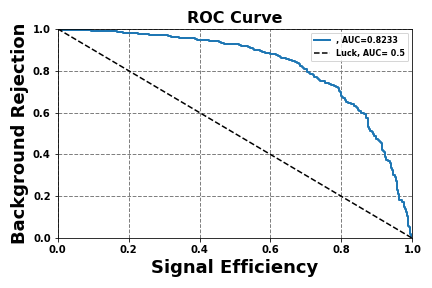

In [17]:
#display the roc curve
from IPython.display import Image
roc_image = glob.glob('logs/*.png')[0]
Image(filename=roc_image) 